In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
imdb

<module 'keras.datasets.imdb' from '/home/vi0/anaconda3/envs/devtf36/lib/python3.6/site-packages/keras/datasets/imdb.py'>

In [4]:
word_index = imdb.get_word_index()

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [6]:
# decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [7]:
import numpy as np

In [8]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [10]:
#for i, sequence in enumerate(train_data):
#    print(i, sequence)

In [9]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [34]:
from keras import models, layers, optimizers, losses, metrics
from keras import regularizers

In [41]:
model = models.Sequential()

# Basic model

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc']) 

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=0)



In [42]:
model_l2 = models.Sequential()

# Weights regularization

model_l2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_l2.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_l2.add(layers.Dense(1, activation='sigmoid'))

model_l2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc']) 

history_l2 = model_l2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=0)


In [43]:
model_drop = models.Sequential()

# Dropout layer

model_drop.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(16, activation='relu'))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(1, activation='sigmoid'))

model_drop.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc']) 

history_drop = model_drop.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=0)

In [45]:
history_dict = history.history
history_l2_dict = history_l2.history
history_drop_dict = history_drop.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

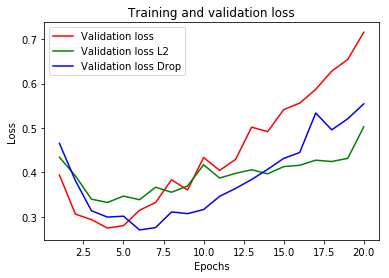

In [48]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

loss_l2_values = history_l2_dict['loss']
val_l2_loss_values = history_l2_dict['val_loss']

loss_drop_values = history_drop_dict['loss']
val_drop_loss_values = history_drop_dict['val_loss']

epochs = range(1, len(loss_values)+1)

#plt.plot(epochs, loss_values, 'bo', label='Training loss')

plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.plot(epochs, val_l2_loss_values, 'g', label='Validation loss L2')
plt.plot(epochs, val_drop_loss_values, 'b', label='Validation loss Drop')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

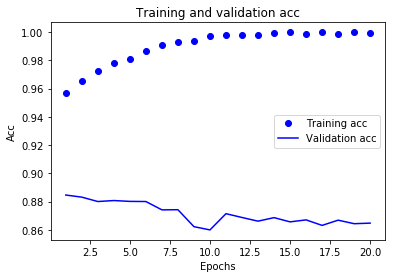

In [27]:
plt.clf()

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [28]:
results = model.evaluate(x_test, y_test)
results

24672/25000 [============================>.] - ETA: 0s

[0.87847009151399136, 0.84611999999999998]

In [33]:
model.predict(x_test)

array([[  9.99637365e-01],
       [  9.46250498e-01],
       [  9.99999881e-01],
       ..., 
       [  9.48383987e-01],
       [  3.61653569e-08],
       [  5.24566531e-01]], dtype=float32)